<a href="https://colab.research.google.com/github/pichuu12/All-projects-and-Internship-tasks/blob/main/TSF_Internship/TSF_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION INTERNSHIP**
# Perform Data Analysis on IPL(Indian Premier League) Dataset

>Find out the factors contributing to win or loss of a team

>Suggest teams/players a company should endorse for their products

Dataset - *link*













### Importing Libraries

In [ ]:
import pandas as pd
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
from collections import defaultdict
import collections
import os
import psutil
import warnings
warnings.filterwarnings('ignore')

### Reading Datasets

In [ ]:
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")

## Data Pre-Processing

In [ ]:
#Correcting 'Rising Pune Supergiants' error (same value indicated as different values)
deliveries = deliveries.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants") 
matches = matches.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants") 

#'Delhi Daredevils' and 'Delhi Capitals' are same
deliveries = deliveries.replace(to_replace="Delhi Daredevils", value ="Delhi Capitals") 
matches = matches.replace(to_replace="Delhi Daredevils", value="Delhi Capitals") 

#'Deccan Chargers' and 'Sunrisers Hyderabad' are same
deliveries = deliveries.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad")
matches = matches.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad")


#Filling Null values in winner column
matches['winner'] = matches['winner'].fillna("No Result")

#Merging similar name of stadiums into one
matches = matches.replace(to_replace="MA Chidambaram Stadium, Chepauk", value="M. A. Chidambaram Stadium") 
matches = matches.replace(to_replace="Punjab Cricket Association IS Bindra Stadium, Mohali", value="Punjab Cricket Association Stadium, Mohali") 
matches = matches.replace(to_replace="M. Chinnaswamy Stadium", value="M Chinnaswamy Stadium") 
matches = matches.replace(to_replace="ACA-VDCA Stadium", value="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium") 
matches = matches.replace(to_replace="Rajiv Gandhi International Stadium, Uppal", value="Rajiv Gandhi Intl. Cricket Stadium")

In [ ]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Capitals', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Ch'], dtype=object)

In [ ]:
Teams={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS' 
}

In [ ]:
deliveries['batting_team']=deliveries['batting_team'].map(Teams)
deliveries['bowling_team']=deliveries['bowling_team'].map(Teams)

In [ ]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,SRH,RCB,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,SRH,RCB,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,SRH,RCB,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,SRH,RCB,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164824,11137,1,RCB,CSK,13.0,2.0,PA Patel,YS Chahal,RA Jadeja,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
164825,11137,1,RCB,CSK,13.0,3.0,YS Chahal,PA Patel,RA Jadeja,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
164826,11137,1,RCB,CSK,13.0,4.0,YS Chahal,PA Patel,RA Jadeja,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
164827,11137,1,RCB,CSK,13.0,5.0,YS Chahal,PA Patel,RA Jadeja,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [ ]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


## Most Successful teams

### Most Number of Matches Won

In [ ]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
No Result                        4
Name: winner, dtype: int64

Mumbai Indians are leading with 109 wins and Chennai Super Kings at second with 100 wins

### Most Finals Played

In [ ]:
finals = matches.drop_duplicates(subset=['season'], keep='last')
finals = finals[['id', 'season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]

In [ ]:
finals

,id,season,city,team1,team2,toss_winner,toss_decision,winner
58,59,2017,Hyderabad,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians
116,117,2008,Mumbai,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals
173,174,2009,Johannesburg,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad
233,234,2010,Mumbai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings
306,307,2011,Chennai,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Chennai Super Kings
380,381,2012,Chennai,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Kolkata Knight Riders
456,457,2013,Kolkata,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians
516,517,2014,Bangalore,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
575,576,2015,Kolkata,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians
635,636,2016,Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [ ]:
most_finals = pd.concat([finals['team1'], finals['team2']]).value_counts().reset_index()
most_finals

,index,0
0,Chennai Super Kings,8
1,Mumbai Indians,5
2,Sunrisers Hyderabad,3
3,Royal Challengers Bangalore,3
4,Kolkata Knight Riders,2
5,Kings XI Punjab,1
6,Rising Pune Supergiants,1
7,Rajasthan Royals,1


In [ ]:
#adding more information and making table clear
most_finals.rename({'index':'team',0:'count'}, axis=1, inplace=True)
wins = finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(wins,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)

most_finals

,team,finals_played,won_count
0,Chennai Super Kings,8,3.0
1,Mumbai Indians,5,4.0
2,Sunrisers Hyderabad,3,2.0
3,Royal Challengers Bangalore,3,0.0
4,Kolkata Knight Riders,2,2.0
5,Kings XI Punjab,1,0.0
6,Rising Pune Supergiants,1,0.0
7,Rajasthan Royals,1,1.0


* Chennai super kings played the most number of finals(8) winning 3 of them
* Mumbai indians played 5 finals and won 4 of them



### Maximum Score in each Season

In [ ]:
matches_list = []
total_innings = []
batting_team = []
runs = []

for match_no in deliveries['match_id'].unique():
    for innings in deliveries[ deliveries['match_id']==match_no ]['inning'].unique():
        df = deliveries[
                        (deliveries['match_id']==match_no) &
                        (deliveries['inning']==innings)
        ]
        total_runs = df['total_runs'].sum()
        runs.append(total_runs)
        matches_list.append(match_no)
        total_innings.append(innings)
        batting_team.append(df['batting_team'].unique()[0])

df1 = pd.DataFrame()
df1['match_id'] = matches_list
df1['total_runs'] = runs
df1['season'] = [matches[matches['id']==i]['season'].unique()[0] for i in matches_list] 
df1['batting_team'] = batting_team

df1

,match_id,total_runs,season,batting_team
0,1,207.0,2017,SRH
1,1,172.0,2017,RCB
2,2,184.0,2017,MI
3,2,187.0,2017,RPS
4,3,183.0,2017,GL
...,...,...,...,...
1400,7952,179.0,2018,SRH
1401,7952,163.0,2018,KKR
1402,7953,186.0,2018,SRH
1403,7953,187.0,2018,CSK


In [ ]:
season = []
teamId = []
max_runs = []
for year in df1['season'].unique():
    maximum_run = df1[ df1['season']==year ]['total_runs'].max()
    team = df1[ (df1['season']==year) & (df1['total_runs']==maximum_run) ]['batting_team'].unique()[0]
    season.append(year)
    teamId.append(team)
    max_runs.append(maximum_run)

max_runs

[230.0,
 240.0,
 211.0,
 246.0,
 232.0,
 222.0,
 263.0,
 231.0,
 235.0,
 248.0,
 250.0,
 59.0]

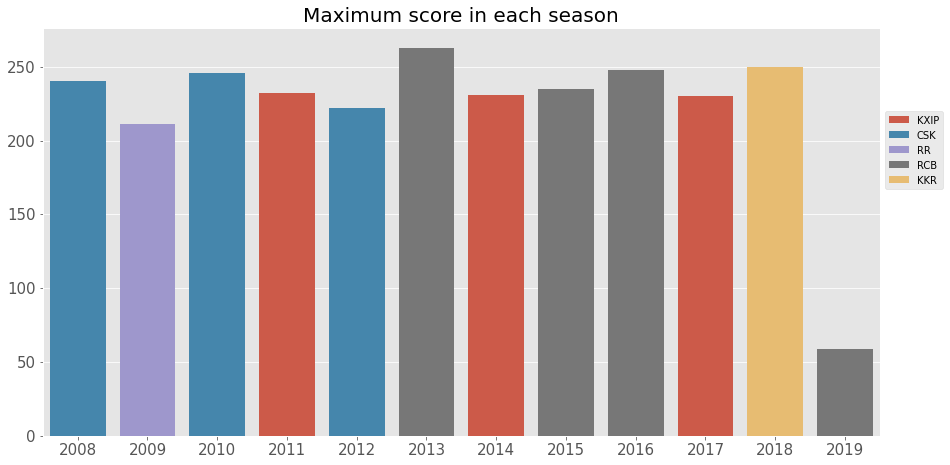

In [ ]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(15,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Maximum score in each season",fontsize=20)
ax=sns.barplot(x = season, y = max_runs, hue = teamId, dodge=False)
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.7))

* CSK set the highest score for season 2008, 2010, 2012
* KXIP set the highest score of all seasons in 2014 -> 263 runs
* RCB set the highest scores for season 2011, 2014, 2017

### Number of Times a Team Scored 200+ score

In [ ]:
scores = deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
scores_200 = scores[scores['total_runs']>=200]
scores_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207.0
30,20,1,RCB,GL,213.0
48,32,1,SRH,KXIP,207.0
56,36,1,SRH,KKR,209.0
76,50,1,KXIP,MI,230.0
...,...,...,...,...,...
1049,7934,1,MI,KKR,217.0
1053,7937,1,KKR,KXIP,250.0
1054,7937,2,KXIP,KKR,221.0
1065,7944,1,RCB,SRH,222.0


<AxesSubplot:title={'center':'Number of times a team scored 200+'}, xlabel='batting_team', ylabel='count'>

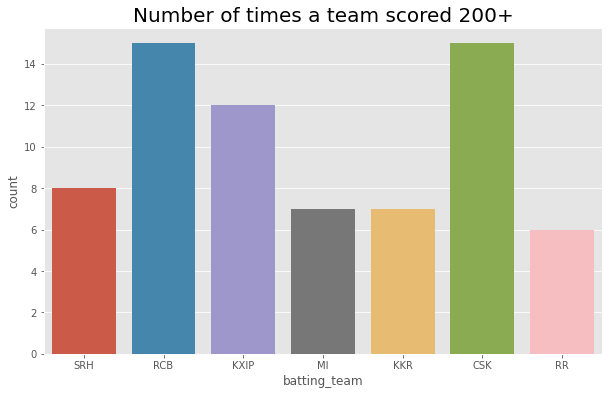

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.title("Number of times a team scored 200+", fontsize=20)
sns.countplot(x='batting_team', data=scores_200)

* RCB scored the most 200+ in all the seasons

### Team Win Percentage

In [ ]:
matches_copy = pd.DataFrame
matches_copy = matches.copy(deep=True)

matches_copy['team1']=matches_copy['team1'].map(Teams)
matches_copy['team2']=matches_copy['team2'].map(Teams)

teams=(matches_copy['team1'].value_counts()+matches_copy['team2'].value_counts()).reset_index()
teams.columns=['team_name','Matches_played']
teams

,team_name,Matches_played
0,CSK,164
1,GL,30
2,KKR,178
3,KTK,14
4,KXIP,176
5,MI,187
6,PW,46
7,RCB,180
8,RPS,30
9,RR,147


In [ ]:
matches_copy['winner']=matches_copy['winner'].map(Teams)
wins=matches_copy['winner'].value_counts().reset_index()
wins.columns=['team_name','wins']
wins

,team_name,wins
0,MI,109
1,CSK,100
2,KKR,92
3,SRH,87
4,RCB,84
5,KXIP,82
6,RR,75
7,RPS,15
8,GL,13
9,PW,12


In [ ]:
player=teams.merge(wins,left_on='team_name',right_on='team_name',how='inner')
player['%win']=(player['wins']/player['Matches_played'])*100
player = player.sort_values('%win', ascending=False)
player

,team_name,Matches_played,wins,%win
0,CSK,164,100,60.975610
5,MI,187,109,58.288770
2,KKR,178,92,51.685393
9,RR,147,75,51.020408
8,RPS,30,15,50.000000
10,SRH,183,87,47.540984
7,RCB,180,84,46.666667
4,KXIP,176,82,46.590909
1,GL,30,13,43.333333
3,KTK,14,6,42.857143


In [ ]:
trace1=go.Bar(x=player['team_name'], y=player['Matches_played'], name='Total Matches')
trace2=go.Bar(x=player['team_name'], y=player['wins'], name='Matches wins')
matches_data=[trace1,trace2]
fig = py.iplot(matches_data)

* CSK is leading with over 60% winrate
* MI, RR, KKR are above 50%

## Most Successful Players 

### Player with most Man of The Match award

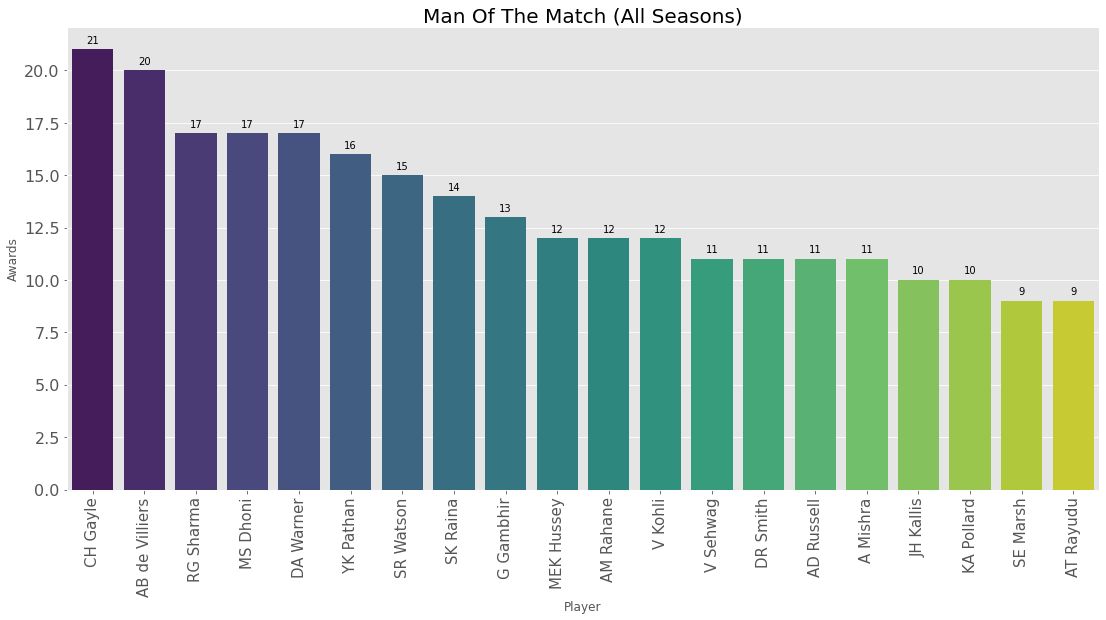

In [ ]:
mom = pd.DataFrame()
mom['Awards']=matches['player_of_match'].value_counts()
mom['Player'] =mom.index
mom=mom[:20]
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,8.5)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=16)
plt.title("Man Of The Match (All Seasons)",fontsize=20)
ax=sns.barplot(x='Player',y='Awards', data=mom, palette='viridis')
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,mom['Awards'].iloc[count],ha="center") 
    count+=1

* Chris Gayle was awarded with most man of the matches -> 21
* AB de Villers with second best -> 20

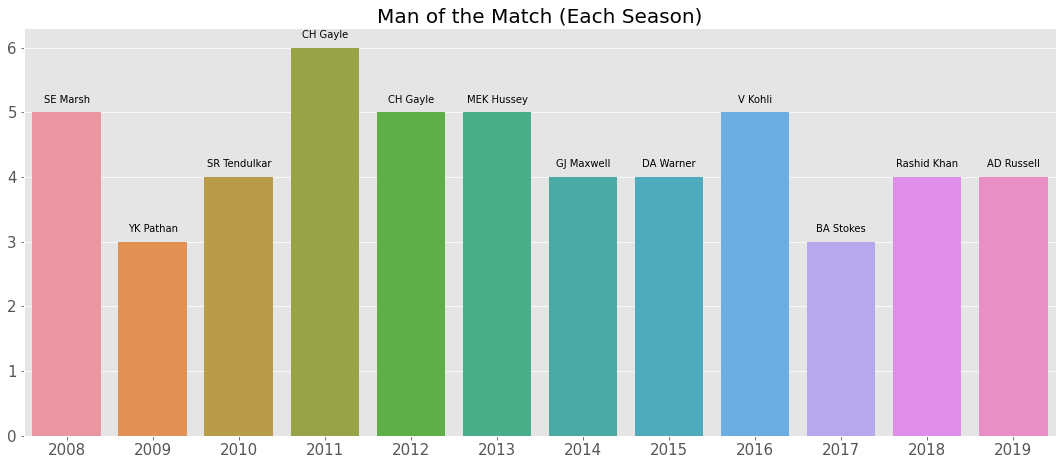

In [ ]:
dic=defaultdict(list)
for i in range(0,len(matches)):
    dic[matches.season.iloc[i]].append(matches.player_of_match.iloc[i])
player=[]
match=[]
year=[]
for i in sorted(dic.keys()):
    ctr=collections.Counter(dic[i])
    d={k: v for k, v in sorted(ctr.items(), key=lambda item: item[1],reverse=True)}
    player.append(list(d.keys())[0])
    match.append(list(d.values())[0])
    year.append(i)
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Man of the Match (Each Season)", fontsize=20)
ax=sns.barplot(year, match)
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.15,player[count],ha="center") 
    count+=1

* CH Gayle got most Man of the Match awards in 2011, 2012

### Players with most runs

In [ ]:
most_runs = pd.DataFrame(deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10))
most_runs.reset_index(inplace=True)
most_runs.columns=['Batsman', 'Total runs']
most_runs

,Batsman,Total runs
0,SK Raina,5014.0
1,V Kohli,4969.0
2,RG Sharma,4504.0
3,G Gambhir,4223.0
4,RV Uthappa,4144.0
5,S Dhawan,4090.0
6,MS Dhoni,4041.0
7,CH Gayle,4037.0
8,DA Warner,4014.0
9,AB de Villiers,3983.0


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

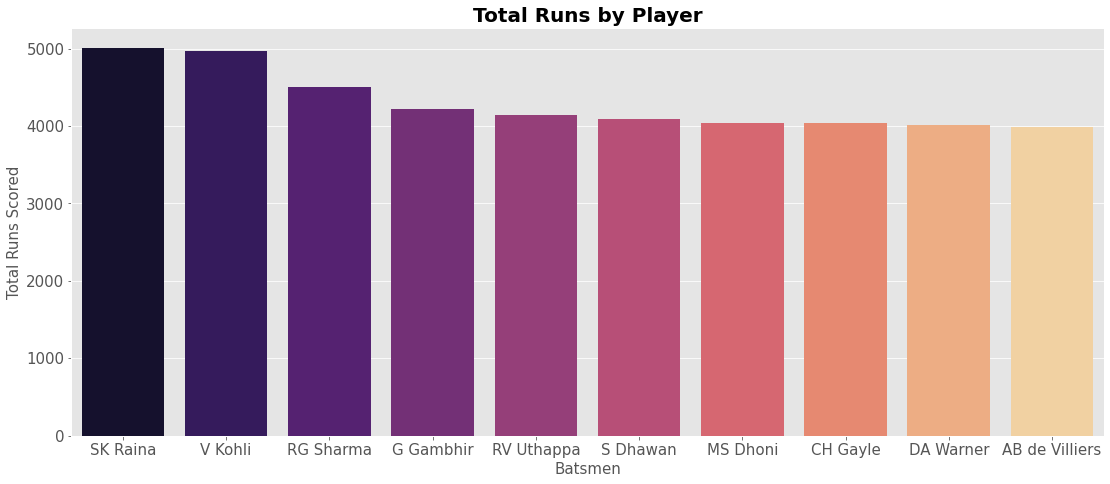

In [ ]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,7.5)

ax=sns.barplot(x='Batsman',y='Total runs', data=most_runs, palette='magma')

plt.title("Total Runs by Player", fontsize=20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 15)
plt.ylabel("Total Runs Scored", size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

* Virat Kohli as a batsmen is leading the Most runs scored by individual player leaderboards

### Highest score by a player in a match

In [ ]:
highest_indv = deliveries.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False).head(10)

In [ ]:
highest_indv

,match_id,batsman,batting_team,batsman_runs
5464,411,CH Gayle,RCB,175.0
781,60,BB McCullum,KKR,158.0
7418,562,AB de Villiers,RCB,133.0
8169,620,AB de Villiers,RCB,129.0
4945,372,CH Gayle,RCB,128.0
2754,206,M Vijay,CSK,127.0
462,36,DA Warner,SRH,126.0
6831,516,V Sehwag,KXIP,122.0
9201,7953,SR Watson,CSK,121.0
3234,243,PC Valthaty,KXIP,120.0


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

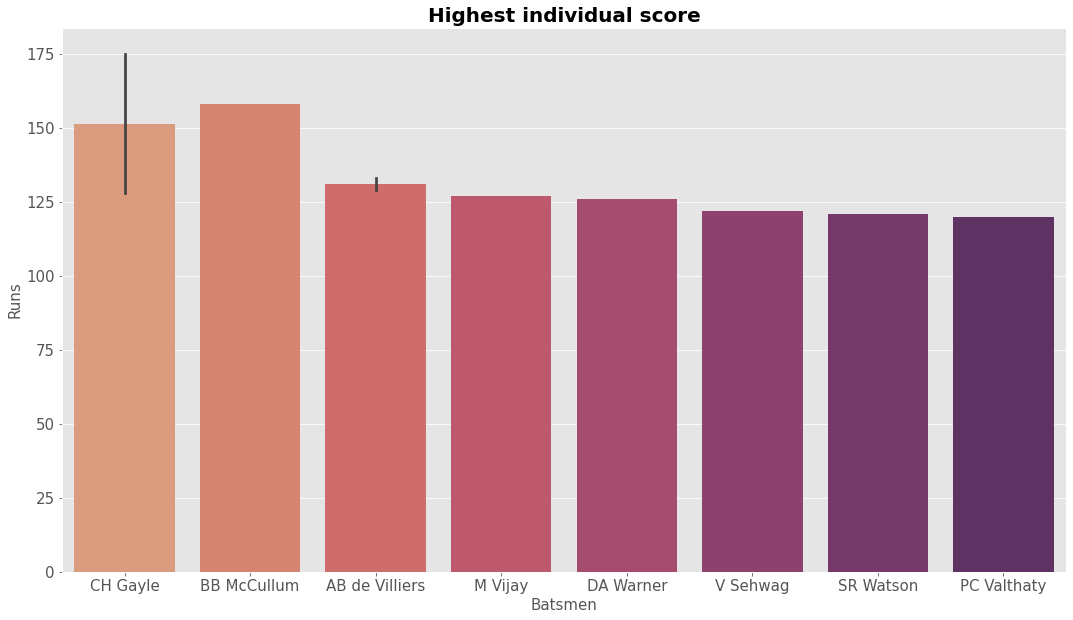

In [ ]:
plt.figure(figsize=(18,10))
sns.barplot(x='batsman',y='batsman_runs',data=highest_indv, palette='flare')
plt.title("Highest individual score", fontsize=20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 15)
plt.ylabel("Runs", size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

* CH Gayle leads the highest runs scored by a player in a single match -> 175

### Boundaries by Batsman

In [ ]:
#Fours
four=deliveries[deliveries['batsman_runs']==4]
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['batsman','4s']
runs_4 = runs_4.sort_values('4s', ascending=False)

In [ ]:
top_10_4s = runs_4.head(10)
top_10_4s

,batsman,4s
117,G Gambhir,492
304,S Dhawan,461
324,SK Raina,448
368,V Kohli,436
298,RV Uthappa,408
86,DA Warner,401
283,RG Sharma,379
35,AM Rahane,360
170,KD Karthik,336
369,V Sehwag,334


(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

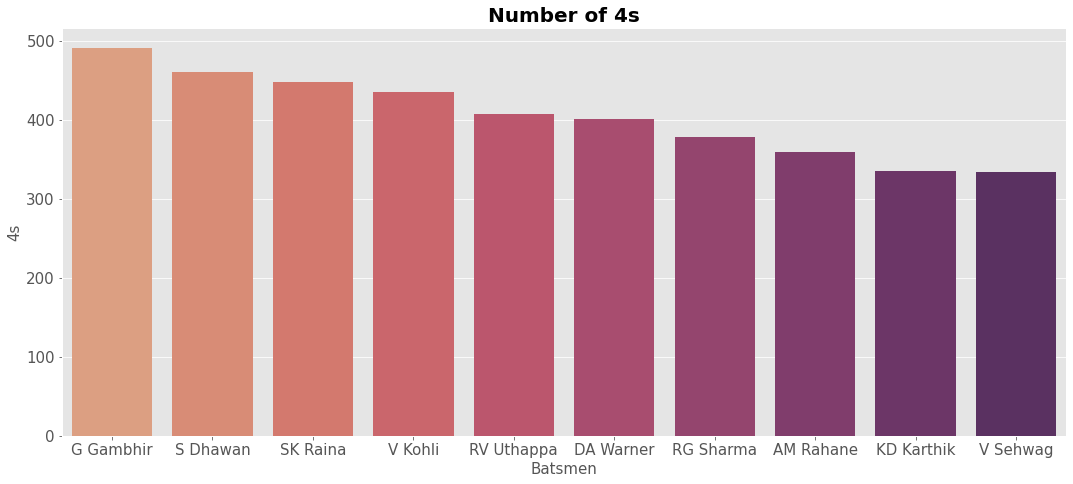

In [ ]:
plt.figure(figsize=(18,7.5))
sns.barplot(x='batsman',y='4s',data=top_10_4s, palette='flare')
plt.title("Number of 4s", fontsize=20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 15)
plt.ylabel("4s", size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

S.Dhawan scored the most numbner of 4s in all the seasons

In [ ]:
#Sixes
six=deliveries[deliveries['batsman_runs']==6]
runs_6=six.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns=['batsman','6s']
runs_6 = runs_6.sort_values('6s', ascending=False)

In [ ]:
top_10_6s = runs_6.head(10)
top_10_6s

,batsman,6s
57,CH Gayle,293
12,AB de Villiers,188
259,SK Raina,186
185,MS Dhoni,186
228,RG Sharma,185
297,V Kohli,178
311,YK Pathan,160
69,DA Warner,160
271,SR Watson,157
133,KA Pollard,155


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

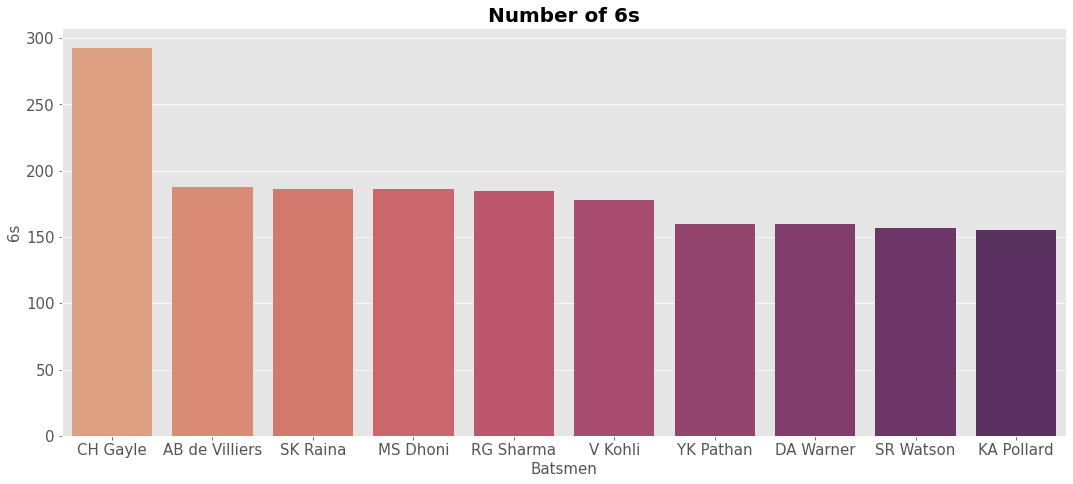

In [ ]:
plt.figure(figsize=(18,7.5))
sns.barplot(x='batsman',y='6s',data=top_10_6s, palette='flare')
plt.title("Number of 6s", fontsize=20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 15)
plt.ylabel("6s", size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

CH Gayle scored the most number of 6s in all the seasons

###Batsman with best strike rate

In [ ]:
runs = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()
balls = deliveries.groupby('batsman')['ball'].count().reset_index()

In [ ]:
runs

,batsman,batsman_runs
0,A Ashish Reddy,280.0
1,A Chandila,4.0
2,A Chopra,53.0
3,A Choudhary,25.0
4,A Dananjaya,4.0
...,...,...
485,YV Takawale,192.0
486,Yashpal Singh,47.0
487,Younis Khan,3.0
488,Yuvraj Singh,2657.0


In [ ]:
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
...,...,...
485,YV Takawale,183
486,Yashpal Singh,67
487,Younis Khan,7
488,Yuvraj Singh,2124


In [ ]:
str_rate=pd.concat([runs,balls.iloc[:,1]],axis=1)
str_rate.fillna(0,inplace=True)
str_rate

,batsman,batsman_runs,ball
0,A Ashish Reddy,280.0,196
1,A Chandila,4.0,7
2,A Chopra,53.0,75
3,A Choudhary,25.0,20
4,A Dananjaya,4.0,5
...,...,...,...
485,YV Takawale,192.0,183
486,Yashpal Singh,47.0,67
487,Younis Khan,3.0,7
488,Yuvraj Singh,2657.0,2124


In [ ]:
str_rate['strike_rate']=(str_rate['batsman_runs']/str_rate['ball'])*100
str_rate = str_rate.sort_values('strike_rate',ascending=False)
str_rate.head(10)

,batsman,batsman_runs,ball,strike_rate
64,B Stanlake,5.0,2,250.000000
459,Umar Gul,39.0,19,205.263158
361,RS Sodhi,4.0,2,200.000000
198,K Gowtham,129.0,67,192.537313
122,DL Chahar,65.0,36,180.555556
430,Shahid Afridi,81.0,46,176.086957
365,Rashid Khan,72.0,41,175.609756
161,I Malhotra,7.0,4,175.000000
72,BCJ Cutting,222.0,129,172.093023
32,AD Russell,900.0,529,170.132325


B.Stanlake was the batsman with the best strike rate but he only played 2 balls scoring 5 runs.

###Top bowlers in IPL

In [ ]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
dismissals = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']

In [ ]:
bowlers = deliveries[deliveries['dismissal_kind'].isin(dismissals)]
bowlers = deliveries.groupby('bowler').apply(lambda x: x['dismissal_kind'].dropna().reset_index(name='wickets'))
bowlers

index wickets
bowler                            
A Ashish Reddy 0     80497  bowled
               1     80502  caught
               2     81750  caught
               3     82253  caught
               4     83084  caught
...                    ...     ...
Z Khan         114  142480  caught
               115  143476  bowled
               116  144752  caught
               117  147288  caught
               118  149389  caught

[8164 rows x 2 columns]

In [ ]:
bowlers_df = bowlers.groupby('bowler').count().reset_index()
top_bowlers = bowlers_df.sort_values(by='wickets', ascending=False)
top_bowlers = top_bowlers.head(10)
top_bowlers

,bowler,index,wickets
276,SL Malinga,170,170
5,A Mishra,155,155
82,DJ Bravo,155,155
109,Harbhajan Singh,147,147
219,PP Chawla,146,146
46,B Kumar,127,127
312,UT Yadav,127,127
234,R Vinay Kumar,127,127
282,SP Narine,126,126
224,R Ashwin,121,121


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

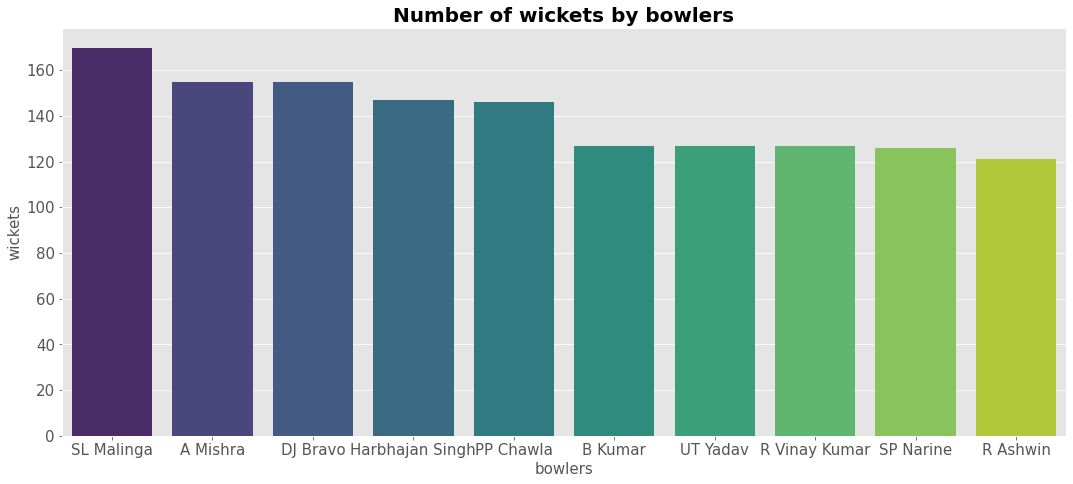

In [ ]:
plt.figure(figsize=(18,7.5))
sns.barplot(x='bowler',y='wickets',data=top_bowlers, palette='viridis')
plt.title("Number of wickets by bowlers", fontsize=20, fontweight = 'bold')
plt.xlabel("bowlers", size = 15)
plt.ylabel("wickets", size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

SL Malinga got the most number of wickets in all the seasons

###All Rounders

In [ ]:
batsmen = deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name="runs")
top_batsmen = batsmen.sort_values(by='runs', ascending=False)
top_batsmen=top_batsmen[top_batsmen.runs>=1000]
top_batsmen.rename(columns = {'batsman': 'player'}, inplace = True)
top_batsmen.head()

,player,runs
402,SK Raina,5014.0
460,V Kohli,4969.0
347,RG Sharma,4504.0
143,G Gambhir,4223.0
364,RV Uthappa,4144.0


In [ ]:
bowlers_df = bowlers.groupby('bowler').count().reset_index()
top_bowlers= bowlers_df.sort_values(by='wickets', ascending=False)
top_bowlers_head=top_bowlers[top_bowlers.wickets>=40].head(10)
top_bowlers

,bowler,index,wickets
276,SL Malinga,170,170
5,A Mishra,155,155
82,DJ Bravo,155,155
109,Harbhajan Singh,147,147
219,PP Chawla,146,146
...,...,...,...
75,D Short,1,1
165,LA Carseldine,1,1
98,FY Fazal,1,1
310,TP Sudhindra,1,1


In [ ]:
top_bowlers.rename(columns = {'bowler': 'player'}, inplace = True)

In [ ]:
all_rounders=pd.merge(top_batsmen, top_bowlers, how='inner')
all_rounders['score']=all_rounders['runs']+25*all_rounders['wickets']
all_rounders = all_rounders.sort_values(by='score', ascending=False)[:5]
all_rounders

,player,runs,index,wickets,score
7,SR Watson,3197.0,107,107,5872.0
0,SK Raina,5014.0,30,30,5764.0
18,DJ Bravo,1408.0,155,155,5283.0
1,V Kohli,4969.0,5,5,5094.0
2,RG Sharma,4504.0,16,16,4904.0


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

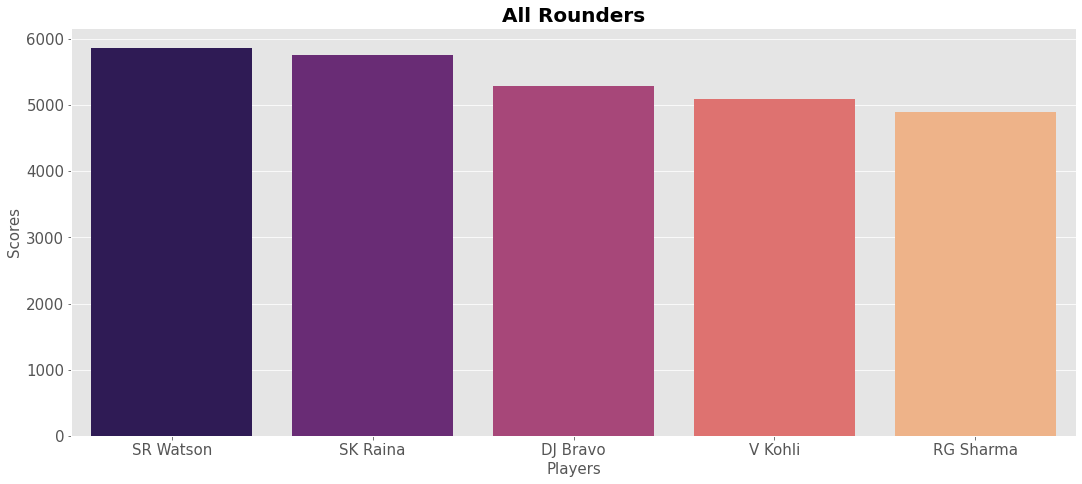

In [ ]:
plt.figure(figsize=(18,7.5))
sns.barplot(x='player',y='score',data=all_rounders, palette='magma')
plt.title("All Rounders", fontsize=20, fontweight = 'bold')
plt.xlabel("Players", size = 15)
plt.ylabel("Scores", size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Factors resulting in Win conditions

###Venue

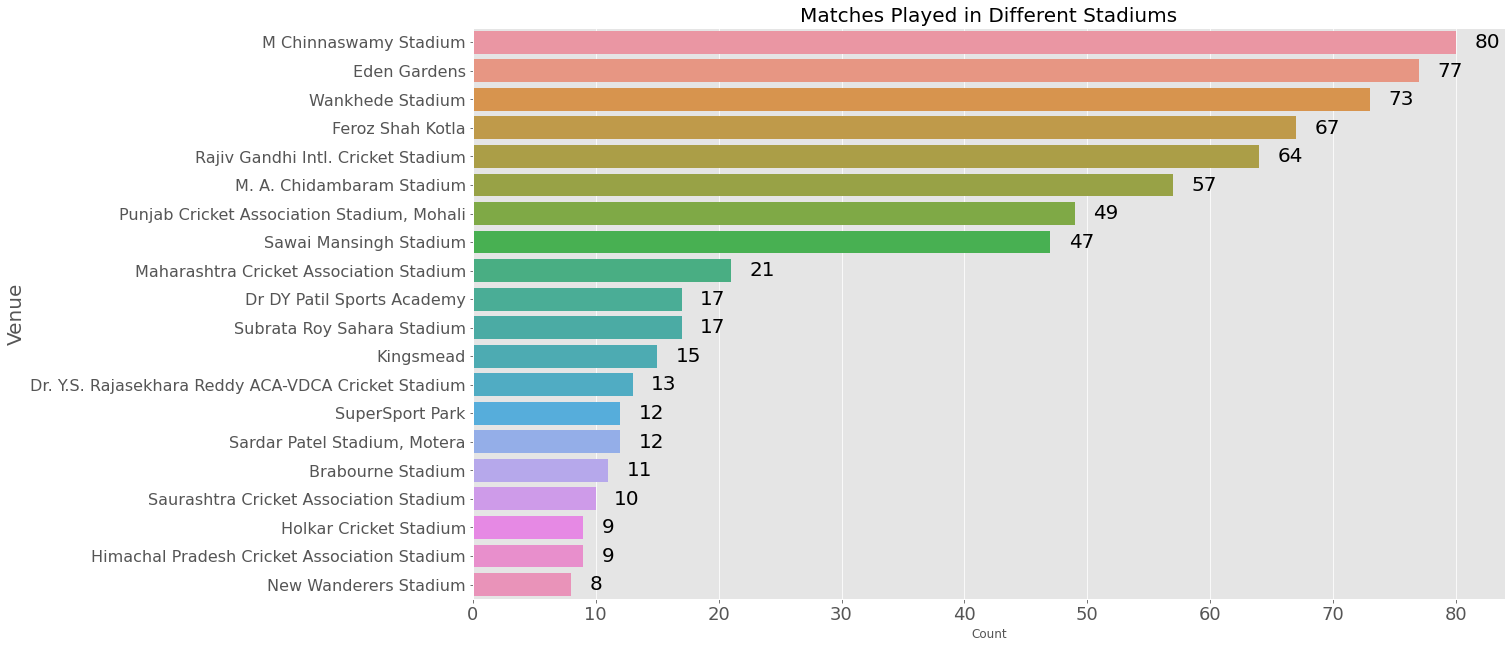

In [ ]:
venue = pd.DataFrame()
venue['Count']=matches['venue'].value_counts()
venue['Venue'] =venue.index
venue=venue[:20]
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.ylabel("Venue", size=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("Matches Played in Different Stadiums",fontsize=20)
ax=sns.barplot(x='Count', y='Venue', data=venue)
count=0

for i, v in enumerate(venue['Count']):
    ax.text(v + 1.5, i, str(v),va="center", fontdict=dict(fontsize=20))

Most matches were played in M Chinnaswamy Stadium

###Toss 

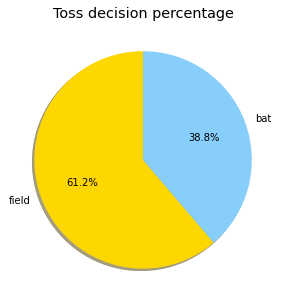

In [ ]:
temp_series = matches.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
fig = plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

Winning the toss teams prefer to bowl first and chase the target

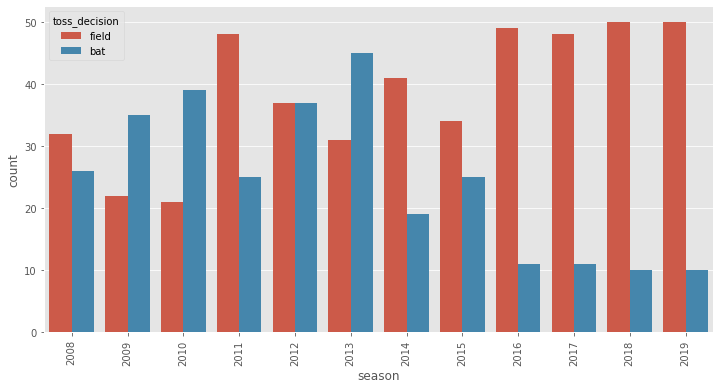

In [ ]:
#toss decision yearwise
fig = plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.xticks(rotation='vertical')
plt.show()

In late 20's the trend of bowling first seems to develop

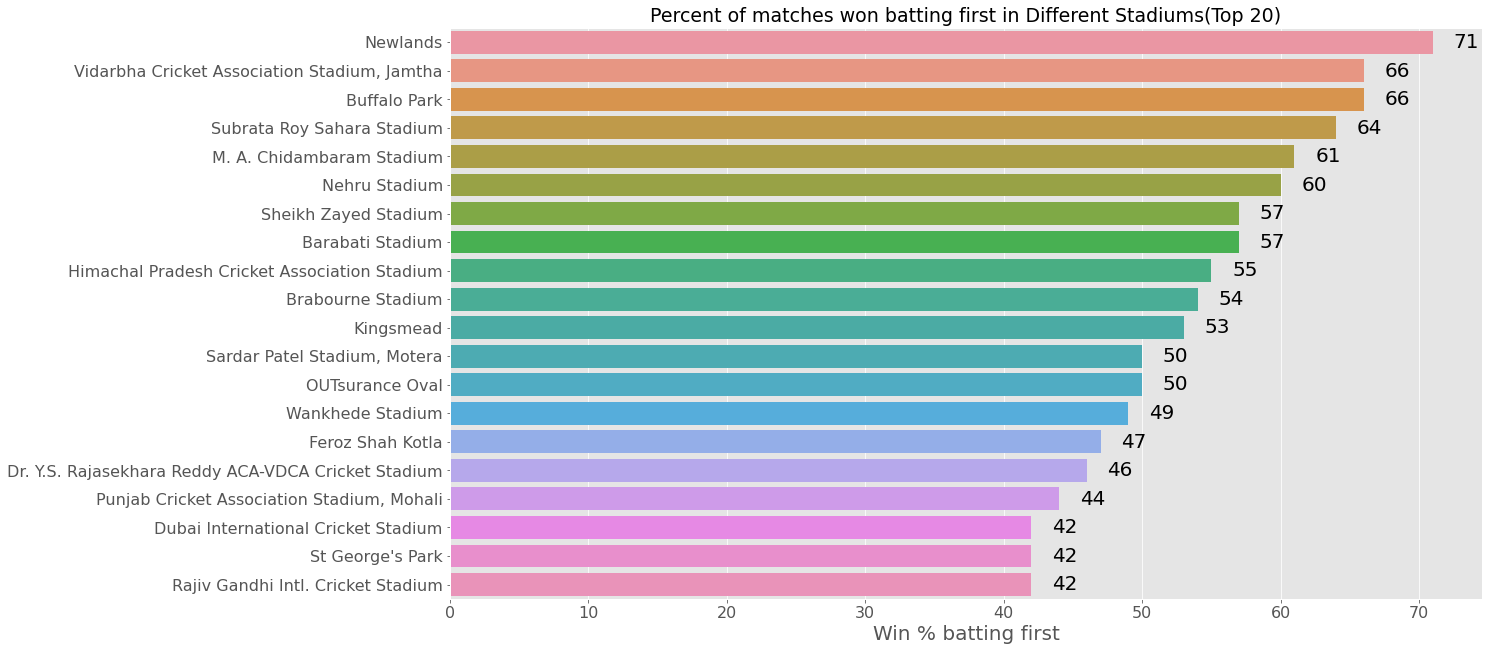

In [ ]:
#matches won in different stadiums batting first
df = pd.DataFrame()
df1 = pd.DataFrame()
chunks = []
chunks.append(matches['toss_winner'][matches['toss_decision']=='bat'])
chunks.append(matches['team2'][(matches['toss_decision']=='field') & (matches['toss_winner'] == matches['team1'])])
chunks.append(matches['team1'][(matches['toss_decision']=='field') & (matches['toss_winner'] == matches['team2'])])

df = pd.DataFrame(pd.concat(chunks))
df = df.sort_index()
df.columns = ['team']

indexes = df[(df['team'] == matches['winner'])&(df.index == matches.index)].index

df1['venue'] = matches['venue'].value_counts()
df1['win_count'] = matches[matches.index.isin(indexes)]['venue'].value_counts()
df1['win %'] = 100 * df1['win_count']/df1['venue'] 
df1 = df1.sort_values(by = ['win %'],ascending = False)
df1 = df1[:20]
winPercent = df1['win %'].astype('int')
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Percent of matches won batting first in Different Stadiums(Top 20)",fontsize=19)
ax=sns.barplot(winPercent[:20], df1[:20].index)
plt.xlabel("Win % batting first", size=20)
count=0

for i, v in enumerate(winPercent):
    ax.text(v + 1.5, i, str(v),va="center", fontdict=dict(fontsize=20))


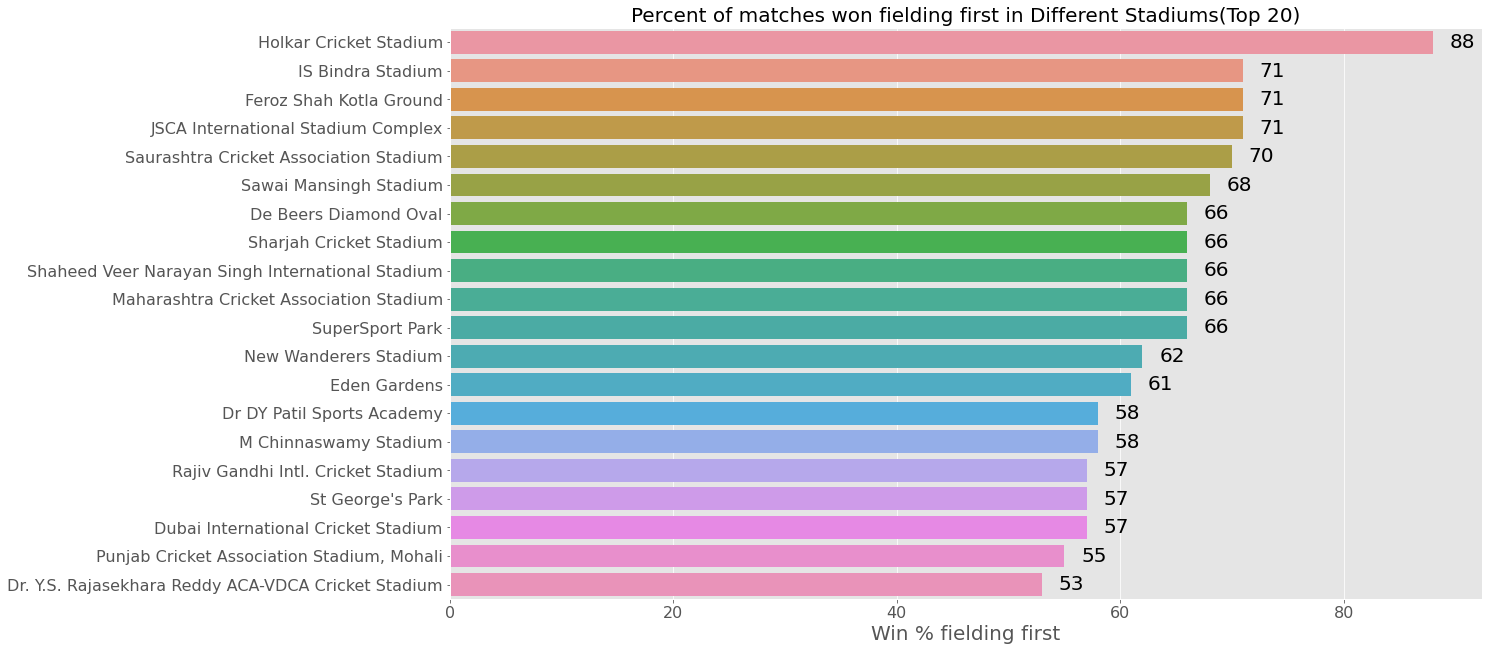

In [ ]:
#matches won when fielding first
df1 = pd.DataFrame()
 
df1['venue'] = matches['venue'].value_counts()
df1['win_count'] = matches[matches.index.isin(indexes)]['venue'].value_counts()
df1['win %'] = 100 * df1['win_count']/df1['venue'] 
df1 = df1.sort_values(by = ['win %'])
df1['win % balling first'] = 100 - df1['win %']
df1 = df1[:20]
df1['win % balling first'] = df1['win % balling first'].astype('int')
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Percent of matches won fielding first in Different Stadiums(Top 20)",fontsize=20)
ax=sns.barplot(df1['win % balling first'],df1.index)
plt.xlabel("Win % fielding first", size=20)
count=0

for i, v in enumerate(df1['win % balling first']):
    ax.text(v + 1.5, i, str(v),va="center", fontdict=dict(fontsize=20))

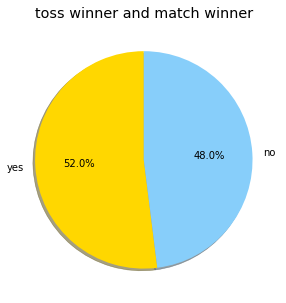

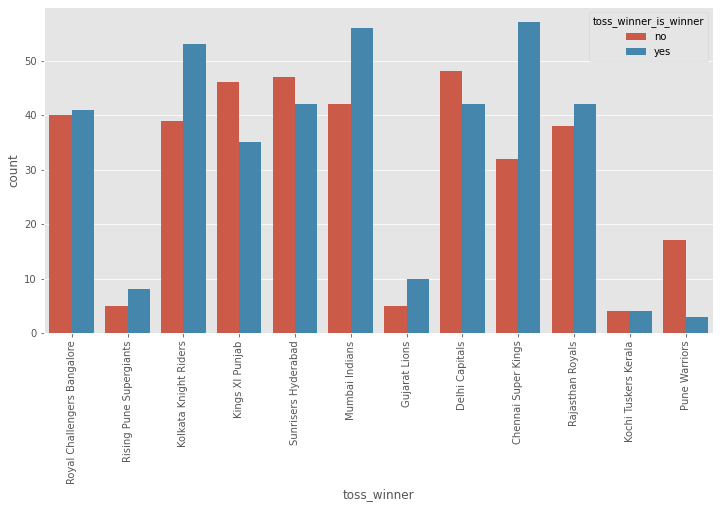

In [ ]:
#toss winning contributing to match winning

matches['toss_winner_is_winner'] = 'no'
matches['toss_winner_is_winner'].iloc[matches.toss_winner == matches.winner] = 'yes'
temp_series = matches.toss_winner_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
fig = plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("toss winner and match winner")
plt.show()
print('\n')

fig = plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=matches)
plt.xticks(rotation='vertical')
plt.show()


One to win the toss have an advantage winning the match.